### Programming Assignment 2 Q2
### Supervised Learning

Group Number : 46

Student 1 : Aryan Singh 19CS30007

Student 2 : Seemant Guruprasad Achari 19CS30057


In [123]:
# importing various tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

from sklearn import svm
from sklearn.neural_network import MLPClassifier


In [124]:
# Column 1 is defined as the class label
LABEL = 1 

# To make outputs reproducible
np.random.seed(101)

In [125]:
# loading the dataset

df = pd.read_csv('lung-cancer.data', header = None, na_values=["?"])
df.columns += 1

In [126]:
print(df.head())

print("Dataset loaded successfully!")

   1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0   1   0   3   0  NaN   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1   1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2   1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3   1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4   1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   

   55  56  57  
0   1   2   2  
1   1   2   2  
2   2   1   2  
3   2   2   2  
4   1   2   2  

[5 rows x 57 columns]
Dataset loaded successfully!


In [127]:
for attr,value in df.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")

Attribute 5 has 4 missing data.
Attribute 39 has 1 missing data.


In [128]:
# Filling the na values with mode of the columns
fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
df_without_na = df.apply(fill_mode, axis=0)

In [129]:
for attr,value in df_without_na.isna().sum().items():
    if(value > 0):
        print(f"Attribute {attr} has {value} missing data.")
print("Missing data handled using mode!")

Missing data handled using mode!


In [130]:
print(df_without_na.head())

   1   2   3   4    5   6   7   8   9   10  ...  48  49  50  51  52  53  54  \
0   1   0   3   0  1.0   0   2   2   2   1  ...   2   2   2   2   2   1   1   
1   1   0   3   3  1.0   0   3   1   3   1  ...   2   2   2   2   2   2   2   
2   1   0   3   3  2.0   0   3   3   3   1  ...   2   2   2   2   2   2   2   
3   1   0   2   3  2.0   1   3   3   3   1  ...   2   2   2   2   2   2   2   
4   1   0   3   2  1.0   1   3   3   3   2  ...   2   2   2   2   2   2   2   

   55  56  57  
0   1   2   2  
1   1   2   2  
2   2   1   2  
3   2   2   2  
4   1   2   2  

[5 rows x 57 columns]


In [131]:
# splitting dataset index maintaing the ratio of class labels
def train_test_split(df,train_sample=0.5,target_col= LABEL):
    all_indexes=[]
    df_grouped= df.groupby(target_col)
    for x,x_df in df_grouped:
        t = x_df.sample(frac=train_sample,).index
        all_indexes.append(t)
    g = all_indexes[0].values
    for k in all_indexes[1:]:
        g=np.hstack([g,k.values])

    train_df = df[df.index.isin(g) ]
    test_df = df[~df.index.isin(g)]
    return train_df, test_df 

In [132]:
print("-------------------------Task-1-Started---------------------------")
train_df, test_df = train_test_split(df_without_na,0.8)

-------------------------Task-1-Started---------------------------


In [133]:
print(f"The shape of training dataset {train_df.shape}")
print(f"The shape of testing dataset {test_df.shape}")

The shape of training dataset (25, 57)
The shape of testing dataset (7, 57)


In [134]:
train_stats = train_df.describe()
train_stats.pop(LABEL)
train_stats = train_stats.transpose()
print(train_stats)


    count  mean       std  min  25%  50%  75%  max
2    25.0  0.00  0.000000  0.0  0.0  0.0  0.0  0.0
3    25.0  2.32  0.556776  1.0  2.0  2.0  3.0  3.0
4    25.0  2.00  1.000000  0.0  2.0  2.0  3.0  3.0
5    25.0  1.36  0.568624  0.0  1.0  1.0  2.0  2.0
6    25.0  0.28  0.458258  0.0  0.0  0.0  1.0  1.0
7    25.0  2.16  0.746101  1.0  2.0  2.0  3.0  3.0
8    25.0  2.16  0.746101  1.0  2.0  2.0  3.0  3.0
9    25.0  2.40  0.763763  1.0  2.0  3.0  3.0  3.0
10   25.0  1.20  0.577350  1.0  1.0  1.0  1.0  3.0
11   25.0  1.44  0.583095  1.0  1.0  1.0  2.0  3.0
12   25.0  1.52  0.714143  1.0  1.0  1.0  2.0  3.0
13   25.0  0.84  0.898146  0.0  0.0  1.0  1.0  3.0
14   25.0  1.92  0.812404  1.0  1.0  2.0  3.0  3.0
15   25.0  2.24  0.723418  1.0  2.0  2.0  3.0  3.0
16   25.0  2.20  0.763763  1.0  2.0  2.0  3.0  3.0
17   25.0  1.28  0.458258  1.0  1.0  1.0  2.0  2.0
18   25.0  1.84  0.374166  1.0  2.0  2.0  2.0  2.0
19   25.0  1.84  0.374166  1.0  2.0  2.0  2.0  2.0
20   25.0  0.44  0.820569  0.0 

In [135]:
attr_to_drop = []
for row, val in train_stats["std"].items():
    if val == 0:
        print(f"Attribute {row} has 0 std in the training set, hence droping it.")
        attr_to_drop.append(row)
train_stats_upd = train_stats.drop(attr_to_drop)
train_df_upd = train_df.drop(attr_to_drop, axis = 1)
test_df_upd = test_df.drop(attr_to_drop, axis = 1)
        

Attribute 2 has 0 std in the training set, hence droping it.


In [136]:
train_labels = train_df_upd.pop(LABEL)
test_labels = test_df_upd.pop(LABEL)

### Data Normalization

In [137]:
def standard_scalar_normalization(df, df_stats):
    # print(df.shape)
    norm_df = (df - df_stats["mean"])/df_stats["std"]
    np.nan_to_num(norm_df, False, 0.0)
    return norm_df

In [138]:
norm_train = standard_scalar_normalization(train_df_upd, train_stats_upd)
norm_test = standard_scalar_normalization(test_df_upd, train_stats_upd)

In [139]:
print("Normalization complete")
print("-------------------------Task-1-Finished--------------------------")


Normalization complete
-------------------------Task-1-Finished--------------------------


In [140]:
print("-------------------------Task-2-Started---------------------------")

def GetAccuracy(trueLabel, pred, printDetails = True):
    total_samples = len(trueLabel)
    cnt = (trueLabel == pred).sum()
    accuracy = cnt / total_samples
    if(printDetails):
        print(f"Accuracy  = {cnt / total_samples}")
    
    return accuracy

-------------------------Task-2-Started---------------------------


In [141]:
model_map = {}
accuracy_map = {}

In [142]:
kernel_types = ['linear', 'poly', 'rbf']

for kernel_type in kernel_types:

    #Create a kernel svm Classifier
    model = svm.SVC(C = 1, 
                    kernel=kernel_type, 
                    degree = 2 # will be ignored by all kernel except poly
                    # Thus poly will become quadratic
                ) #  Kernel

    #Train the model using the training sets
    model.fit(norm_train, train_labels)


    y_pred = model.predict(norm_train)
    acc = GetAccuracy(train_labels, y_pred, False)
    print(f"Training Accuracy for SVM with {kernel_type} kernel = {acc}")

    #Predict the response for test dataset
    y_pred = model.predict(norm_test)
    acc = GetAccuracy(test_labels, y_pred, False)
    print(f"Testing Accuracy for SVM with {kernel_type}  kernel = {acc}")


    model_map[kernel_type] = model
    accuracy_map[kernel_type] = acc
print("-------------------------Task-2-Finished--------------------------")


Training Accuracy for SVM with linear kernel = 1.0
Testing Accuracy for SVM with linear  kernel = 0.5714285714285714
Training Accuracy for SVM with poly kernel = 0.88
Testing Accuracy for SVM with poly  kernel = 0.42857142857142855
Training Accuracy for SVM with rbf kernel = 0.92
Testing Accuracy for SVM with rbf  kernel = 0.5714285714285714
-------------------------Task-2-Finished--------------------------


In [143]:
print("-------------------------Task-3-Started---------------------------")

mlp_model_map= {}
mlp_model_accuracy = {}
mlp_models_sizes = {
    'Single Hidden Layer' : (16,),
    'Multi Hidden Layer' : (256, 16)
}

-------------------------Task-3-Started---------------------------


In [144]:
for name, layerSize in mlp_models_sizes.items():
    mlp = MLPClassifier(learning_rate_init = 0.001, batch_size=16, hidden_layer_sizes=layerSize, solver='sgd', max_iter = 5000)
    mlp.fit(norm_train, train_labels)
    pred = mlp.predict(norm_test)
    acc = GetAccuracy(test_labels, pred, False)
    print(f"{name} has {layerSize} nodes")
    print(f"Testing Accuracy for MLP with {name}  = {acc}")
    mlp_model_map[name] = mlp
    mlp_model_accuracy[name] = acc
print("-------------------------Task-3-Finished--------------------------")


Single Hidden Layer has (16,) nodes
Testing Accuracy for MLP with Single Hidden Layer  = 0.8571428571428571
Multi Hidden Layer has (256, 16) nodes
Testing Accuracy for MLP with Multi Hidden Layer  = 0.42857142857142855
-------------------------Task-3-Finished--------------------------


In [145]:

print("-------------------------Task-4-Started---------------------------")

bestSetting = max(mlp_model_accuracy, key= mlp_model_accuracy.get)
LayerSize = mlp_models_sizes[bestSetting]
y_data = []
x_data = [0.1, 0.01, 0.001, 0.0001, 0.00001]
for l_rate in x_data:
    mlp = MLPClassifier(learning_rate_init = l_rate, batch_size=16, hidden_layer_sizes=layerSize, solver='sgd', max_iter = 5000)
    mlp.fit(norm_train, train_labels)
    pred = mlp.predict(norm_test)
    acc = GetAccuracy(test_labels, pred, False)
    print(f"Testing Accuracy for MLP with learning rate {l_rate}  = {acc}")
    y_data.append(acc)

-------------------------Task-4-Started---------------------------
Testing Accuracy for MLP with learning rate 0.1  = 0.8571428571428571
Testing Accuracy for MLP with learning rate 0.01  = 0.7142857142857143
Testing Accuracy for MLP with learning rate 0.001  = 0.8571428571428571
Testing Accuracy for MLP with learning rate 0.0001  = 0.42857142857142855
Testing Accuracy for MLP with learning rate 1e-05  = 0.5714285714285714


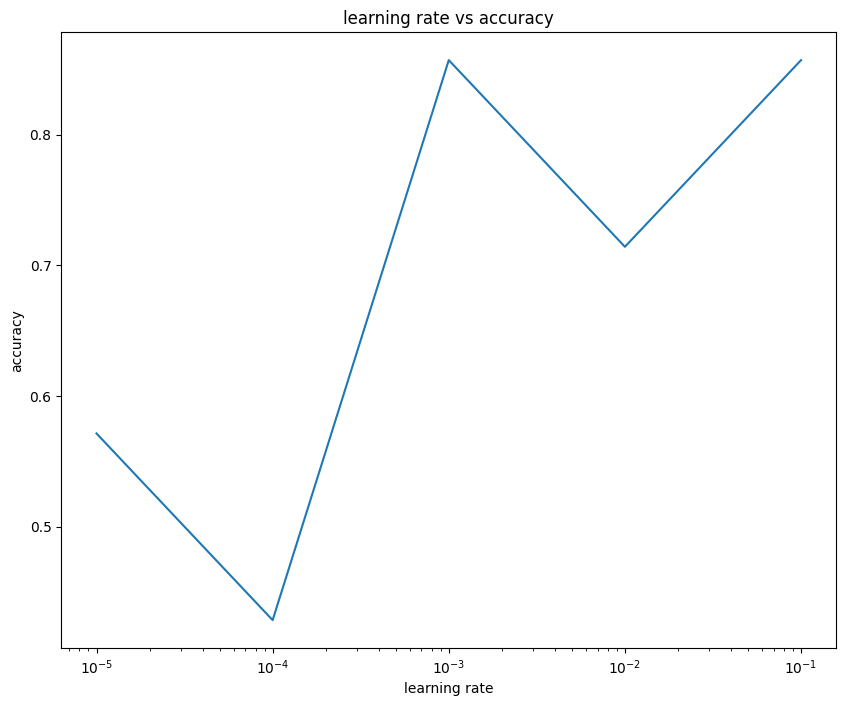

-------------------------Task-4-Finished--------------------------


In [146]:
plt.figure(figsize = (10,8))
plt.plot(x_data, y_data)
plt.title("learning rate vs accuracy")
plt.xlabel("learning rate")
plt.ylabel("accuracy")
plt.xscale("log")
plt.show()

print("-------------------------Task-4-Finished--------------------------")


In [147]:
def modelEvaluation(model, df, printInfo = False):
    fill_mode = lambda col: col.replace(np.nan, col.mode()[0])
    df_without_na = df.apply(fill_mode, axis=0)
    train_df, test_df = train_test_split(df_without_na,0.8)
    train_stats = train_df.describe()
    train_stats.pop(LABEL)
    train_stats = train_stats.transpose()
    attr_to_drop = []
    for row, val in train_stats["std"].items():
        if val == 0:
            if (printInfo):
                print(f"Attribute {row} has 0 std in the training set, hence droping it.")
            attr_to_drop.append(row)
            return 0.0 # since it has a useless attribute
    train_stats_upd = train_stats.drop(attr_to_drop)
    train_df_upd = train_df.drop(attr_to_drop, axis = 1)
    test_df_upd = test_df.drop(attr_to_drop, axis = 1)
    # print(train_df_upd.shape)
    train_labels = train_df_upd.pop(LABEL)
    test_labels = test_df_upd.pop(LABEL)
    norm_train = standard_scalar_normalization(train_df_upd, train_stats_upd)
    norm_test = standard_scalar_normalization(test_df_upd, train_stats_upd)

    mlp = model
    mlp.fit(norm_train, train_labels)
    pred = mlp.predict(norm_test)
    acc = GetAccuracy(test_labels, pred, False)
    if (printInfo):
        print(f"Testing Accuracy for MLP = {acc}")
    return acc

# Stepwise Forward Selection
def sfs(model, pd_data):
    '''
    # takes data frame and model as input
    # and then returns the dataframe with the optimal attributes
    '''
    # get len of attributes
    no_of_columns = len(pd_data.columns) # number of columns
    class_column_index = 0
    # get the class label
    class_column_colname = pd_data.columns[class_column_index]
 
    # Record the number of available attributes
    no_of_available_attributes = no_of_columns - 1
 
    # Create a dataframe containing the available attributes by removing the Class Column
    available_attributes_df = pd_data.drop(columns = [class_column_colname]) 
 
    # Create an empty optimal attribute dataframe 
    optimal_attributes_df = pd_data[[class_column_colname]]
 
    # Init the base performance 
    base_performance = -9999.0
 
    # Check whether adding a new attribute to the optimal attributes dataframe
    # improves performance
    # While there are still available attributes left
    while no_of_available_attributes > 0: 
        # init best performace
        best_performance = -9999.0
 
        best_attribute = "NA"
 
        # For all attributes in the available attribute data frame
        for col in range(0, len(available_attributes_df.columns)):
 
            # Record the name of this attribute
            this_attr = available_attributes_df.columns[col]
         
            # Create a new dataframe with this attribute inserted
            temp_opt_attr_df = optimal_attributes_df.copy()
            temp_opt_attr_df.insert(loc=1,column=this_attr,value=(available_attributes_df[this_attr]))
 
            # Run Naive Bayes on this new dataframe and return the 
            # classification accuracy
            current_performance = modelEvaluation(model, temp_opt_attr_df)
 
            # Find the new attribute that yielded the greatest
            # classification accuracy
            if current_performance > best_performance:
                best_performance = current_performance
                best_attribute = this_attr
 
        # adding another feature lead to improvement?
        if best_performance > base_performance:
            base_performance = best_performance
 
            # Add the best attribute to the optimal attribute data frame
            optimal_attributes_df.insert(
                loc=1,column=best_attribute,value=(
                available_attributes_df[best_attribute]))
 
            # Remove the best attribute from the available attribute data frame
            available_attributes_df = available_attributes_df.drop(
                columns = [best_attribute]) 
            
            print(f"Testing Accuracy for MLP = {best_performance}")
            print("Attribute "+str(best_attribute) + " added to the optimal attribute subset")
            no_of_available_attributes -= 1
 
            print(str(no_of_available_attributes) + " attributes remaining")
        else:
            print("Performance did not improve this round.")
            print("End of Stepwise Forward Selection.")
            break
        print()
    # Return the optimal attribute set
    return optimal_attributes_df

In [148]:
print("-------------------------Task-5-Started---------------------------")

bestSetting = max(mlp_model_accuracy, key= mlp_model_accuracy.get)
bestModel = mlp_model_map[bestSetting]

opt_df = sfs(bestModel, df)

-------------------------Task-5-Started---------------------------
Testing Accuracy for MLP = 0.7142857142857143
Attribute 21 added to the optimal attribute subset
55 attributes remaining

Testing Accuracy for MLP = 0.8571428571428571
Attribute 2 added to the optimal attribute subset
54 attributes remaining

Performance did not improve this round.
End of Stepwise Forward Selection.


In [149]:
print(f"The best set of features are {list(opt_df.columns)}, here we have also included the label class 1")
print("-------------------------Task-5-Finished--------------------------")


The best set of features are [1, 2, 21], here we have also included the label class 1
-------------------------Task-5-Finished--------------------------


In [150]:
class ensembleModel:
    def __init__(self, models):
        self.models = models
    def fit(self, train_df, train_label):
        for model in self.models:
            model.fit(train_df, train_label)
    
    def predict(self, test_df):
        # predict using voting method
        predictions = []
        for model in self.models:
            pred = model.predict(test_df)
            predictions.append(pred)
        result = scipy.stats.mode(np.stack(predictions), axis=0)
        return result.mode[0]

In [151]:
print("-------------------------Task-6-Started---------------------------")

bestSetting = max(mlp_model_accuracy, key= mlp_model_accuracy.get)
bestModel = mlp_model_map[bestSetting]
modelsForEnsemble = [model_map['poly'], model_map['rbf'], bestModel]

ensemblemodel= ensembleModel(modelsForEnsemble)

ensemblemodel.fit(norm_train, train_labels)
pred = ensemblemodel.predict(norm_test)
acc = GetAccuracy(test_labels, pred, False)
print(f"Testing Accuracy for Max Vote Ensemble model = {acc}")
print("-------------------------Task-6-Finished--------------------------")


-------------------------Task-6-Started---------------------------
Testing Accuracy for Max Vote Ensemble model = 0.5714285714285714
-------------------------Task-6-Finished--------------------------
